In [1]:
import pandas as pd
import numpy as np

from tabulate import tabulate


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


#link = 'https://drive.google.com/file/d/1wpvbxGzzX1m0lcsnUXOAPd_vAE08URbN'

link = 'https://drive.google.com/open?id=1VOAhrB5eIhFc8C5qeFx5QYa2OLD7s1eV'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id})
file.GetContentFile('loan-clean-version.csv')
df  = pd.read_csv('loan-clean-version.csv')
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,...,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,...,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,...,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid


In [2]:
df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,earliest_cr_line,inq_last_6mths,...,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,9.004000e+03,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9.004000e+03,9004.000000,9004.000000,9004.000000,...,9004.000000,9004.000000,9001.000000,9004.000000,9004.0,9004.0,9004.000000,9004.000000,9004.000000,9004.000000
mean,9.632337e+05,12291.884163,12154.156486,12076.054639,12.126728,357.478229,6.957693e+04,13.889958,37300.462794,0.857175,...,0.047423,13658.416148,52.368789,22.438583,0.0,0.0,13037.547635,12943.841207,10563.492623,2328.716827
std,7.953238e+04,8285.682170,8096.937145,8033.211335,4.195740,227.180439,4.885841e+04,6.609968,4379.652217,1.043980,...,0.215667,15038.825421,27.644807,11.146531,0.0,0.0,9838.298075,9743.909609,7946.456673,2650.982007
min,4.581650e+05,1000.000000,1000.000000,750.000000,5.420000,30.160000,6.000000e+03,0.000000,19998.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,8.778840e+05,6000.000000,6000.000000,6000.000000,8.490000,187.750000,4.200000e+04,8.860000,34455.000000,0.000000,...,0.000000,4559.750000,30.500000,14.000000,0.0,0.0,5802.197477,5779.940000,4800.000000,682.042500
50%,9.879685e+05,10000.000000,10000.000000,10000.000000,11.710000,312.910000,6.000000e+04,13.940000,36161.000000,1.000000,...,0.000000,9889.000000,54.700000,21.000000,0.0,0.0,10623.210000,10577.545000,8650.000000,1367.130000
75%,1.033607e+06,16000.000000,16000.000000,15975.000000,15.230000,469.360000,8.300000e+04,19.082500,42827.000000,1.000000,...,0.000000,17468.250000,75.000000,29.000000,0.0,0.0,17354.405075,17225.490000,14500.000000,2881.767500
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.110000,1288.100000,1.782000e+06,29.920000,43076.000000,8.000000,...,2.000000,148804.000000,99.900000,79.000000,0.0,0.0,56809.051630,56475.050000,35000.010000,21809.050000


## Data Exploration:


In [3]:
df.head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,loan_status
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,...,13648,83.7,9,0,0,5861.071414,5831.78,5000.00,861.07,Fully Paid
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,Less than 1 year,RENT,...,1687,9.4,4,0,0,1008.710000,1008.71,456.46,435.17,Charged Off
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,...,2956,98.5,10,0,0,3003.653644,3003.65,2400.00,603.65,Fully Paid
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,...,5598,21.0,37,0,0,12226.302210,12226.30,10000.00,2209.33,Fully Paid
4,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,...,7963,28.3,12,0,0,5631.377753,5631.38,5000.00,631.38,Fully Paid
5,1072053,3000,3000,3000.0,36 months,18.64,109.43,E,9 years,RENT,...,8221,87.5,4,0,0,3938.144334,3938.14,3000.00,938.14,Fully Paid
6,1071795,5600,5600,5600.0,60 months,21.28,152.39,F,4 years,OWN,...,5210,32.6,13,0,0,646.020000,646.02,162.02,294.94,Charged Off
7,1071570,5375,5375,5350.0,60 months,12.69,121.45,B,Less than 1 year,RENT,...,9279,36.5,3,0,0,1476.190000,1469.34,673.48,533.42,Charged Off
8,1070078,6500,6500,6500.0,60 months,14.65,153.45,C,5 years,OWN,...,4032,20.6,23,0,0,7677.520000,7677.52,6500.00,1177.52,Fully Paid
9,1069908,12000,12000,12000.0,36 months,12.69,402.54,B,10+ years,OWN,...,23336,67.1,34,0,0,13943.080000,13943.08,12000.00,1943.08,Fully Paid


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9004 non-null   int64  
 1   loan_amnt            9004 non-null   int64  
 2   funded_amnt          9004 non-null   int64  
 3   funded_amnt_inv      9004 non-null   float64
 4   term                 9004 non-null   object 
 5   int_rate             9004 non-null   float64
 6   installment          9004 non-null   float64
 7   grade                9004 non-null   object 
 8   emp_length           8688 non-null   object 
 9   home_ownership       9004 non-null   object 
 10  annual_inc           9004 non-null   float64
 11  verification_status  9004 non-null   object 
 12  purpose              9004 non-null   object 
 13  addr_state           9004 non-null   object 
 14  dti                  9004 non-null   float64
 15  earliest_cr_line     9004 non-null   i

In [7]:
df.isna().sum()

,0
id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
emp_length,316
home_ownership,0


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [10]:
df.loc[:, 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,7487
Charged Off,1517


## EDA

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() #makes the plot looks better

numCol = [] #creates an empty list to store the names of columns with the data type float
for col in df: #After the loop, numCol contains the names of all float-type columns
  if df[col].dtype == float:
    numCol.append(col)
  corr = df[numCol].corr()

[Text(0.5, 0, 'funded_amnt_inv'),
 Text(1.5, 0, 'int_rate'),
 Text(2.5, 0, 'installment'),
 Text(3.5, 0, 'annual_inc'),
 Text(4.5, 0, 'dti'),
 Text(5.5, 0, 'revol_util'),
 Text(6.5, 0, 'total_pymnt'),
 Text(7.5, 0, 'total_pymnt_inv'),
 Text(8.5, 0, 'total_rec_prncp'),
 Text(9.5, 0, 'total_rec_int')]

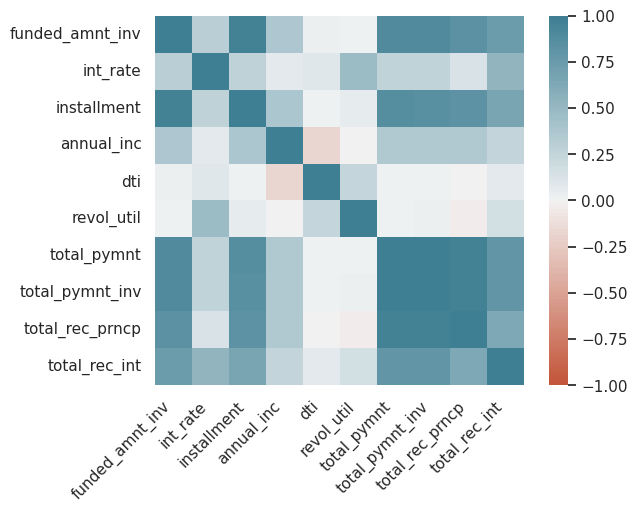

In [14]:
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [16]:
corr_score = df[numCol].corr()
corr_score

,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
funded_amnt_inv,1.000000,0.302945,0.959195,0.371554,0.025192,0.022395,0.884368,0.885395,0.829373,0.734486
int_rate,0.302945,1.000000,0.267857,0.076103,0.091614,0.470893,0.259296,0.258493,0.124425,0.531955
installment,0.959195,0.267857,1.000000,0.385192,0.017451,0.056484,0.859719,0.859358,0.827792,0.660184
annual_inc,0.371554,0.076103,0.385192,1.000000,-0.176920,-0.005319,0.366455,0.364869,0.365577,0.253143
dti,0.025192,0.091614,0.017451,-0.176920,1.000000,0.243479,0.020130,0.019860,-0.004552,0.077365
revol_util,0.022395,0.470893,0.056484,-0.005319,0.243479,1.000000,0.022241,0.024014,-0.036570,0.171383
total_pymnt,0.884368,0.259296,0.859719,0.366455,0.020130,0.022241,1.000000,0.998224,0.968533,0.795019
total_pymnt_inv,0.885395,0.258493,0.859358,0.364869,0.019860,0.024014,0.998224,1.000000,0.966596,0.794365
total_rec_prncp,0.829373,0.124425,0.827792,0.365577,-0.004552,-0.036570,0.968533,0.966596,1.000000,0.634057
total_rec_int,0.734486,0.531955,0.660184,0.253143,0.077365,0.171383,0.795019,0.794365,0.634057,1.000000


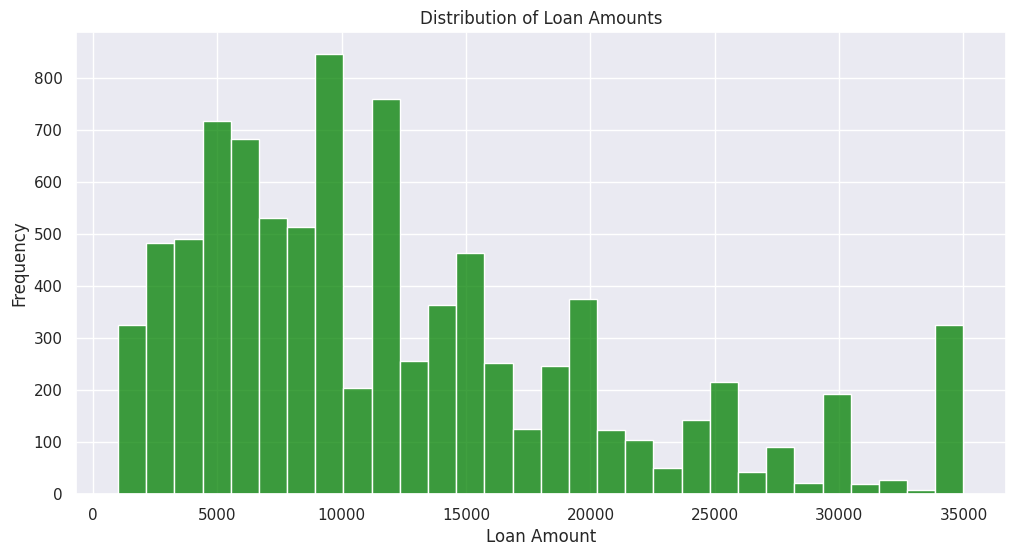

In [19]:
# Chart of loan amount:
plt.figure(figsize=(12, 6))
sns.histplot(df['loan_amnt'], bins=30, color = 'green')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.show()

In [20]:
location = df.groupby("addr_state").sum().reset_index() #Sums all numeric columns (e.g., loan_amnt) for each group, excludes non-numeric
location = location.filter(["addr_state", "loan_amnt"], axis=1)

location.head()

,addr_state,loan_amnt
0,AK,359675
1,AL,1308425
2,AR,753275
3,AZ,2477200
4,CA,20470425


In [22]:
!pip install plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=location['addr_state'], # Spatial coordinates
    z = location['loan_amnt'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = 'Total Loan Amount by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()